In [ ]:
! pip install shap
! pip install pdpbox

     |████████████████████████████████| 358kB 5.1MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp37-cp37m-linux_x86_64.whl size=490504 sha256=8691209dd05188cc673f6494e6c91b7c042476c952f4c6fe9fea2995e3ea189e
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap
     |████████████████████████████████| 57.7MB 74kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp37-none-any.whl size=57690722 sha256=bc3208115e8685242a56cd6e522f498126d294c95f54896ac4ea082848be9f10
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


### 미래를 예측 한다는것은 불가능한가?
- 주식시장이나 외환거래와 같이 시장경제를 예측하는 것 뿐만 아니라
- 산업현장에서의 예측되는 위험을 미리 발견하고 예방하거나
- 개인의 건강데이터를 바탕으로 예측되는 질병의 발병이나 만성질환을 환자 본인이 관리 하거나
- 코로나와 같은 전염병으로 인한 의료붕괴를 사전에 예측하고 그에 대응하는 의료체계와 인력을 보완하거나
- 위와 같이 우리가 해결해야 하는 문제는 시간문제인 경우가 많다
- 이처럼 시계열데이터가 갖는 불완전한 특성을 알아보고 이를 어떻게 보정할지, 나아가 이를 바탕으로 불완전한 미래를 조금이라도 예측하는 방법에 대해 알아보고자 한다.

### 데이터 선정 이유와 문제 정의
- 데이터 선정은 암호화폐(비트코인) 시계열 데이터를 선정하였다.
- 첫번째 이유는 2022년 1월부터 시행될 특금법에 따라 가상화폐에도 해당소득의 20%를 세금으로 징수한다는 정부발표가 있었고, 이는 암호화폐도 화폐로서의 가치를 인정한다는 의미로 해석된다.하지만 그에 상응하는 투자자 보호에 대한 정책마련은 전무하다. 
- 이러한 시점에서 비트코인을 중심으로 암호화폐를 다루는 경제기사는 난무하고 있고, 신규 투자자들의 혼란을 가중시키고 있다.
- 이에 따라 투자목적으로 암호화폐에 접근하고자하는 신규 투자자들을 위해 가상화폐의 시계열 데이터를 다뤄보고 이것이 어느정도의 안정성을 지니는지 객관적인 지표를 도출해보고자 한다.
- 두번째 이유는 일반적인 주식시장과는 다르게 24시간 거래가 가능하고, 하루에도 등락이 급격하게 이루어지는 암호화폐 데이터는 기본적으로 시계열 데이터가 지녀야할 안정성 확보에 어려움이 큰 데이터이다. 
- 이러한 특성을 이용하여 어떻게 해당 시계열 데이터를 안정화하고 보다 실제 가격과 가깝게 예측하는 모델은 어떻게 만들 수 있을지 알아보고자 한다.

#### 시계열 데이터를 통해 미래를 예측하려면 필요한 전제
- 과거의 데이터에 일정한 패턴이 발견된다
- 과거의 패턴은 미래에도 동일하게 반복될 것이다
- 즉, 안정적인 데이터에 대해서만 미래 예측이 가능하다는 의미로 해석된다
- 이는 시간의 변화와는 무관하게 일정한 프로세스가 존재한다는것으로도 볼 수 있다.
    - 기후변화와 같이 시간의 흐름에 따라 어느정도 반복적인 패턴을 보인다면, 과거와 현재를 비교하여 앞으로 예상되는 기후변화를 예측 할 수 있을것이다.

#### 시계열 데이터 분석은 완벽한 미래 예측을 보장하지 못한다
- 그럼에도 불구하고 미래를 예측해야 한다면,
- 데이터의 안정성을 훼손하는 외부 데이터(특성)을 어떠한 기준으로 선정해야 하는지가 중요하게 작용 할 것이다.
- 또한 의도적으로 불안정한 데이터를 안정화 하는 작업도 필요할 것이다.

#### 타겟 설정과 시계열 데이터의 안정화
- 데이터는 야후 파이낸스의 2014년 2월 부터 2021년 2월 최근자까지의 비트코인-달러 데이터를 활용하였다.
- 시계열 데이터의 안정화를 하기위해 **ARIMA(자기회귀누적이동평균)모델**을 선택하여 적용 해 보고자 한다. 
- 이를 베이스라인 모델로 선형회귀 모델과 비교해보고, 각 모델의 예측정확도를 백분위로 표현한 MAPE 를 평가지표로 하여 평가하기로 한다.

#### 안정적인 시계열 데이터의 특징
- 아래 링크를 참고하여 안정적인 시계열 데이터가 갖추어야 할 조건을 살펴보았다  
http://www.dodomira.com/2016/04/21/arima_in_r/

- 시간의 추이와 관계 없이 평균이 불변할때
- 시간의 추이와 관계 없이 분산이 불변할때
- 두 시점 간의 공분산 ( 자기 공분산 - autocovariance ) 이 기준시점과 무관할때
- 위 조건을 충족하면 안정적인 시계열 데이터라고 할 수 있다.


#### 간단 요약
- 통계적으로 어려운 용어와 개념이 등장하여 간단히 요약하여 이해해보면
- 어느 한때, 즉 시각을 t 라고 했을때 x(t-1), x(t-2), X(t-3), x(t-4) 와 같은 과거의 변화를 가지고 x(t+1)의 값을 예측한다고 했을때
- 해당 예측이 유의미하려면 t에 무관하게 예측이 맞아야 한다는 것이다.
- 시간에 따른 변화량을 h라고 했을때 x(t-h)와 x(t)는 t와 무관하게 h에 대해서만 달라지는 일정한 상관도를 지녀야 한다
- 위 기준이 충족되지 않는다면 과거에서 발견한 패턴이 미래에도 반복될 것이라는 시계열 예측의 전제가 무의미하다고 볼 수 있다.


#### 시계열 데이터 준비


In [ ]:
!pip install statsmodels

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Time Series 생성


df = pd.read_csv('/content/drive/MyDrive/Projects/section2_porject/BTC-USD.csv', index_col='Date', parse_dates=True)
ts = df['Close'] # 타겟 설정

ts.head()

Date
2014-09-17    457.334015
2014-09-18    424.440002
2014-09-19    394.795990
2014-09-20    408.903992
2014-09-21    398.821014
Name: Close, dtype: float64

In [ ]:
ts.shape # 데이터 크기 확인

(2352,)

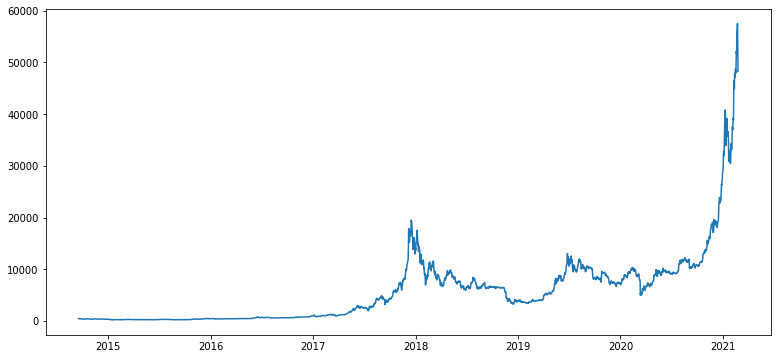

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # 크기 지정
# 시계열(time series) 시각화
plt.plot(ts);

Series([], Name: Close, dtype: float64)


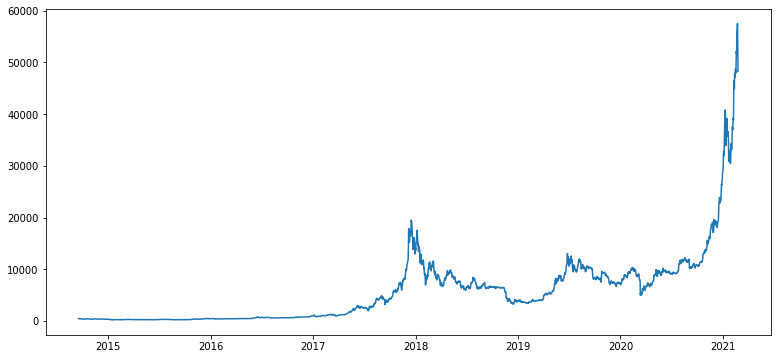

In [ ]:
# 결측치가 있다면 보간, 보간 기준은 time
ts=ts.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 확인
print(ts[ts.isna()])

# 다시 그래프를 확인
plt.plot(ts);

- 일정 시간 내 구간 통계치(Rolling Statistics)를 시각화해 보는 함수선언
- 현재 타임스텝부터 window에 주어진 타임스텝 이전 사이 구간의 
- 평균(rolling mean, 이동평균)
- 표준편차(rolling std, 이동표준편차) 
-를 원본 시계열과 비교

In [ ]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    

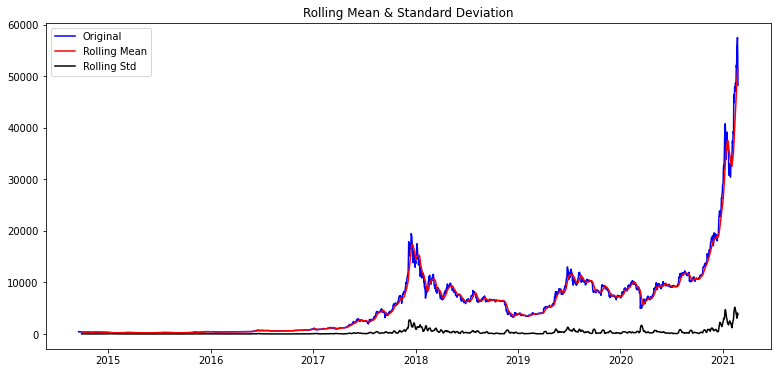

In [ ]:
plot_rolling_statistics(ts, window=12) #이동편균과 표준편차 시각화

#### 기본모델 생성 (선형회귀)

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

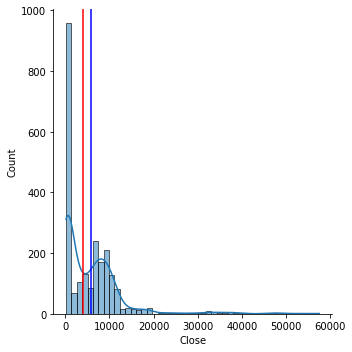

In [ ]:
## SalePrice의 확률밀도함수 시각화
sns.displot(ts, kde=True)

## 평균과, 중간값으로 수직선을 시각화
plt.axvline(ts.mean(), color='blue')
plt.axvline(ts.median(), color='red');

In [ ]:
# predict: 우리가 정한 기준모델인 평균으로 예측을 합니다
predict = ts.mean()

In [ ]:
# 평균값으로 예측할 때 샘플 별 평균값과의 차이(error)를 저장합니다
errors = predict - ts

In [ ]:
errors

Date
2014-09-17     5265.126226
2014-09-18     5298.020239
2014-09-19     5327.664251
2014-09-20     5313.556249
2014-09-21     5323.639227
                  ...     
2021-02-19   -50165.672572
2021-02-20   -50377.059290
2021-02-21   -51817.485072
2021-02-22   -48484.860072
2021-02-23   -42558.117884
Name: Close, Length: 2352, dtype: float64

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
mean_absolute_error = errors.abs().mean()

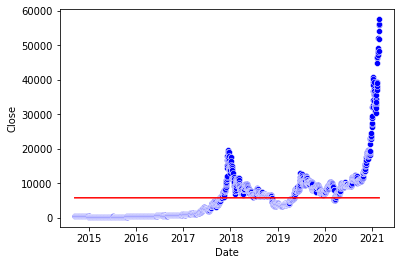

In [ ]:
x = df.index
y = ts

# predict = ts.mean()
# errors = predict - ts
# mean_absolute_error = errors.abs().mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

In [ ]:
tdf = df.copy()
tdf.reset_index(inplace=True)
tdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [ ]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2352 non-null   datetime64[ns]
 1   Open       2348 non-null   float64       
 2   High       2348 non-null   float64       
 3   Low        2348 non-null   float64       
 4   Close      2348 non-null   float64       
 5   Adj Close  2348 non-null   float64       
 6   Volume     2348 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 128.8 KB


In [ ]:
#데이트타입 형변환
from datetime import date
tdf['Date'] = tdf['Date'].apply(lambda x: x.strftime('%Y%m%d'))
tdf['Date']  = tdf['Date'].astype(int)

In [ ]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2352 non-null   int64  
 1   Open       2348 non-null   float64
 2   High       2348 non-null   float64
 3   Low        2348 non-null   float64
 4   Close      2348 non-null   float64
 5   Adj Close  2348 non-null   float64
 6   Volume     2348 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 128.8 KB


In [ ]:
tdf['Date']

0       20140917
1       20140918
2       20140919
3       20140920
4       20140921
          ...   
2347    20210219
2348    20210220
2349    20210221
2350    20210222
2351    20210223
Name: Date, Length: 2352, dtype: int64

In [ ]:
# Scikit-Learn 라이브러리에서 사용할 예측모델 클래스를 Import 합니다
from sklearn.linear_model import LinearRegression
# 예측모델 인스턴스를 만듭니다
model = LinearRegression()
# X 특성들의 테이블과, y 타겟 벡터를 만듭니다


X_train = tdf['Date']
y_train = tdf['Close']

In [ ]:
## 모델을 학습(fit)합니다
#model.fit(X_train, y_train)

ValueError: ignored

In [ ]:
print(f'예측한 비트코인 가격은 ${predict:,.0f}이며 절대평균에러가 ${mean_absolute_error:,.0f}임을 확인할 수 있습니다.')

예측한 비트코인 가격은 $5,722이며 절대평균에러가 $4,861임을 확인할 수 있습니다.


In [ ]:
X_test = [[x] for x in tdf['Date'] > 20210130]
y_pred = model.predict(X_test)

NotFittedError: ignored

#### 기본모델 생성 실패

### 각종 전처리 수행

In [ ]:
# 결측치 처리
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력
# 결측치 없음

Series([], Name: Close, dtype: float64)

In [ ]:
ts.head()

Date
2014-09-17    457.334015
2014-09-18    424.440002
2014-09-19    394.795990
2014-09-20    408.903992
2014-09-21    398.821014
Name: Close, dtype: float64

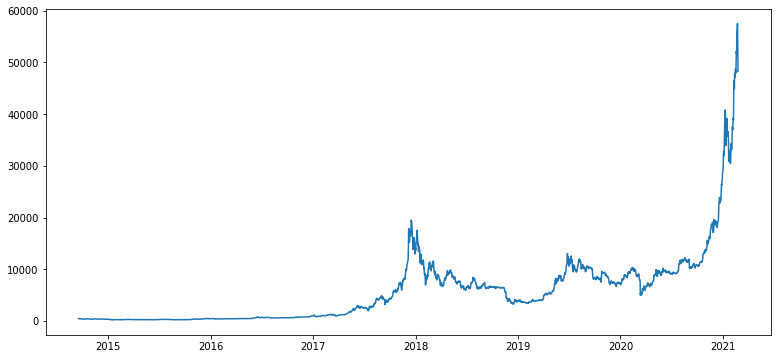

In [ ]:
plt.plot(ts);

#### 시간 추이에 따라 분산이 점점 커지므로 이를 로그함수로 변환하여 안정화 하기

In [ ]:
# 로그 변환을 통한 시계열 가공 
ts_log = np.log(ts)
ts_log.head()

Date
2014-09-17    6.125414
2014-09-18    6.050771
2014-09-19    5.978369
2014-09-20    6.013480
2014-09-21    5.988513
Name: Close, dtype: float64

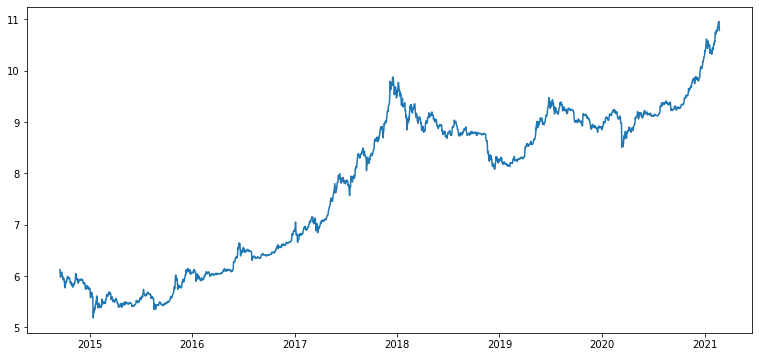

In [ ]:
plt.plot(ts_log);

In [ ]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                    0.269732
p-value                           0.975912
#Lags Used                       10.000000
Number of Observations Used    2341.000000
Critical Value (1%)              -3.433146
Critical Value (5%)              -2.862775
Critical Value (10%)             -2.567428
dtype: float64


### 가설설정

#### Augmented Dickey-Fuller Test(ADF Test)
- 시계열 데이터의 안정성을 테스트하는 통계적 방법으로 ADF Test를 적용하였다.
- 이 테스트는 주어진 시계열 데이터가 안정적이지 않다라는 귀무가설(Null Hypothesis)를 세운 후, 
- 통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우에 이 시계열 데이터가 안정적이다라는 대립가설(Alternative Hypothesis)을 채택한다고 한다.  

#### 가설 설정

- 귀무가설 : 비트코인의 시계열 데이터는 안정적이지 않다
- 대립가설 : 비트코인의 시계열 데이터는 안정적이다
- 유의수준은 0.05로 설정

### 함수선언 및 라이브러리 불러오기


#### statsmodels 패키지를 사용하였다.
- R에서 제공하는 통계검정, 시계열분석 등의 기능을 파이썬에서도 이용할 수 있도록 하는  통계 패키지인 statsmodels를 사용
- statsmodels 패키지에서 제공하는 adfuller 메소드를 이용해 주어진 timeseries에 대한 Augmented Dickey-Fuller Test(ADF Test)를 수행하는 코드를 활용하였다.


In [ ]:
! pip install statsmodels #라이브러리 설치

### 1.안정적 시계열 데이터를 위해 Moving average 제거
#### 이동평균 rolling mean 을 구하고 제거하여 추세 trend 상쇄하기
- 추세 trend는 시간 추이에 따라 나타나는 평균값 변화를 뜻하며,
- 시간 추이에 따라 평균이 증가하는 부분을 상쇄하는것으로 시계열 데이터를 안정화 할 수 있다.

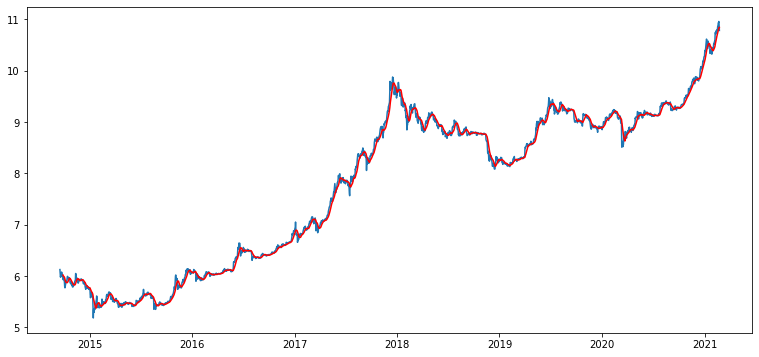

In [ ]:
#Moving average 제거 - 추세(Trend) 상쇄하기
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [ ]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Date
2014-09-17         NaN
2014-09-18         NaN
2014-09-19         NaN
2014-09-20         NaN
2014-09-21         NaN
2014-09-22         NaN
2014-09-23         NaN
2014-09-24         NaN
2014-09-25         NaN
2014-09-26         NaN
2014-09-27         NaN
2014-09-28   -0.085928
2014-09-29   -0.074046
2014-09-30   -0.036229
2014-10-01   -0.042475
Name: Close, dtype: float64

In [ ]:
# 이동 평균 계산시 발생한 결측치 제거
ts_log_moving_avg.dropna(inplace=True)#결측치 제거
ts_log_moving_avg.head(15)

Date
2014-09-28   -0.085928
2014-09-29   -0.074046
2014-09-30   -0.036229
2014-10-01   -0.042475
2014-10-02   -0.057800
2014-10-03   -0.091523
2014-10-04   -0.163855
2014-10-05   -0.163988
2014-10-06   -0.113859
2014-10-07   -0.078664
2014-10-08   -0.018686
2014-10-09    0.022509
2014-10-10    0.016499
2014-10-11    0.021510
2014-10-12    0.067214
Name: Close, dtype: float64

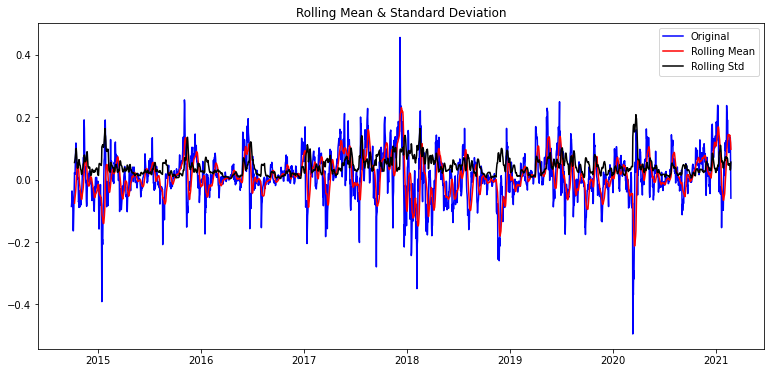

In [ ]:
plot_rolling_statistics(ts_log_moving_avg)

In [ ]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                -9.819043e+00
p-value                        5.399532e-17
#Lags Used                     1.100000e+01
Number of Observations Used    2.329000e+03
Critical Value (1%)           -3.433161e+00
Critical Value (5%)           -2.862782e+00
Critical Value (10%)          -2.567431e+00
dtype: float64


### 안정적 시계열 데이터를 위해 차분 Differencing 하기
#### 계절성 Seasonality 상쇄하기
- 추세 trend에는 포착되지 않지만, 시계열 데이터 안에 포함된 주기적인 변화는 데이터의 불안정성 요소이다
- 이러한 계절적, 주기적 변화를 계절성 Seasonality라고 한다
- 이러한 패턴을 상쇄하기 위해 차분 Differencing 을 사용한다
    - 차분은 시계열을 한 스텝 앞으로 이동한 시계열을 원래 시계열에서 빼 주는 방법이다
    - 이를 통해 남는 값은 (현재 스텝 값 - 직접 스탭 값)으므로 이번 스텝에서 발생한 변화량을 나타낸다
    

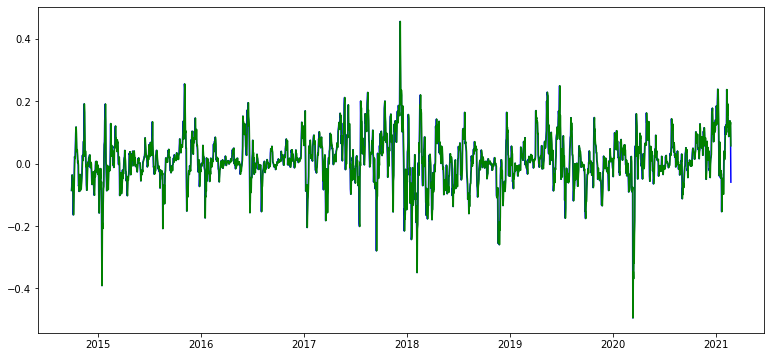

In [ ]:
#차분을 위한 시프트 값 구하기
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

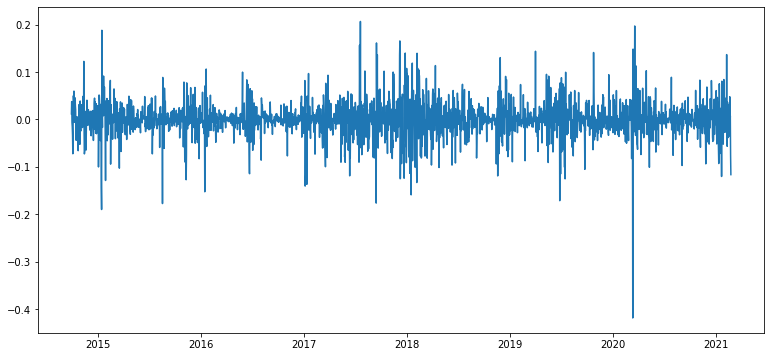

In [ ]:
#1차 차분
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

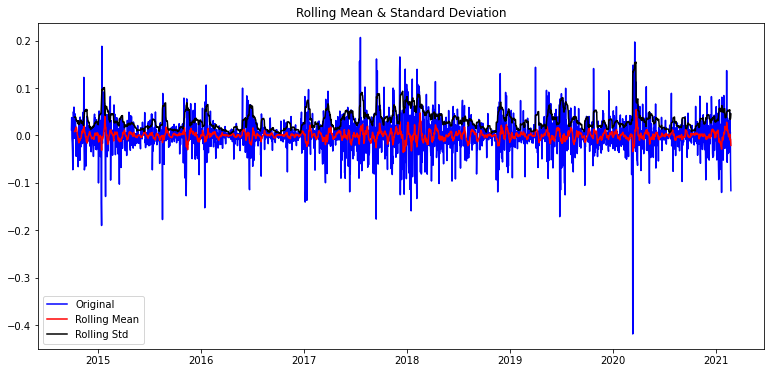

In [ ]:
#1차 차분 시각화
plot_rolling_statistics(ts_log_moving_avg_diff)

In [ ]:
#1차 차분 결과
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.429872e+01
p-value                        1.239591e-26
#Lags Used                     2.400000e+01
Number of Observations Used    2.315000e+03
Critical Value (1%)           -3.433178e+00
Critical Value (5%)           -2.862789e+00
Critical Value (10%)          -2.567435e+00
dtype: float64


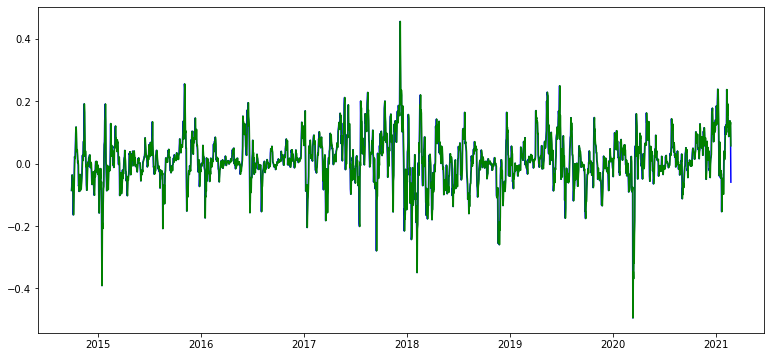

In [ ]:
#2차 차분 시도
ts_log_moving_avg_diff_shift2 = ts_log_moving_avg_diff.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

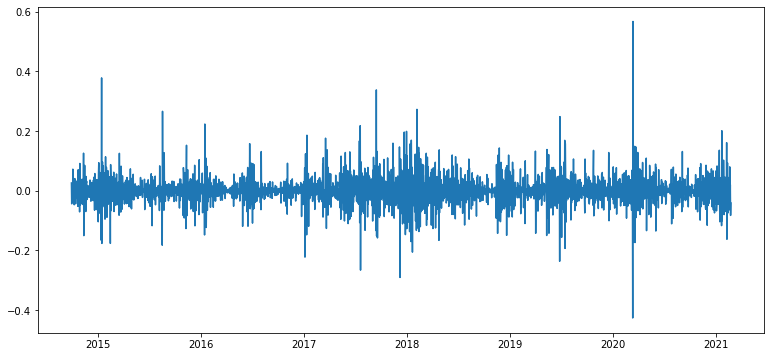

In [ ]:
#2차 차분 
ts_log_moving_avg_diff2 = ts_log_moving_avg_diff - ts_log_moving_avg_diff_shift2
ts_log_moving_avg_diff2.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff2);

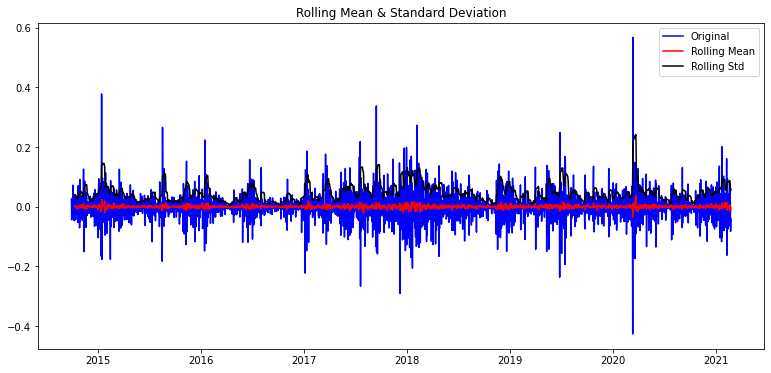

In [ ]:
#2차 차분 시각화
plot_rolling_statistics(ts_log_moving_avg_diff2)

In [ ]:
#2차 차분 결과
augmented_dickey_fuller_test(ts_log_moving_avg_diff2)

Results of Dickey-Fuller Test:
Test Statistic                -1.807191e+01
p-value                        2.602585e-30
#Lags Used                     2.600000e+01
Number of Observations Used    2.312000e+03
Critical Value (1%)           -3.433182e+00
Critical Value (5%)           -2.862791e+00
Critical Value (10%)          -2.567436e+00
dtype: float64


- Trend를 제거하고 난 시계열에다가 1차 차분(1st order differencing)을 적용하여 Seasonality 효과를 다소 상쇄하여도 여전히 높은 p-value (1.23)값을 보인다
- 2차 차분(2nd order differencing, 차분의 차분)을 적용하면 더욱 p-value를 낮출 수 있는지 확인해 보았다지만 오히려 늘어난 양상을 볼 수 있다.

#### 시계열 분해(Time series decomposition)
- statsmodels 라이브러리 안에는 seasonal_decompose 메소드를 활용하면
- 시계열 안에 존재하는 trend, seasonality를 직접 분리 할 수 있다.
- 위 기능을 활용하면 moving average 제거, differencing 등을 거치지 않고도 훨씬 안정적인 시계열을 분리가 가능하다고 한다.


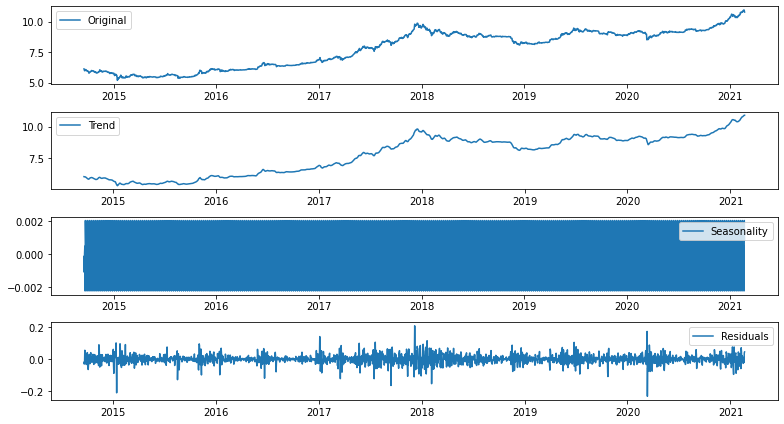

In [ ]:
# seasonal_decompose 을 사용한 시계열 데이터 분해
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend # 추세
seasonal = decomposition.seasonal #계절성
residual = decomposition.resid #잔차

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

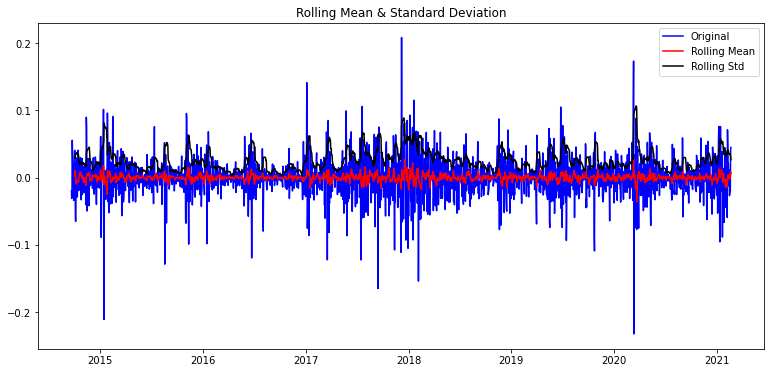

In [ ]:
#seasonal_decompose를 활용한 잔차 구하기
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [ ]:
#추세와 계절성을 분리한 시계열 데이터의  ADF test 
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.573675e+01
p-value                        1.270044e-28
#Lags Used                     2.300000e+01
Number of Observations Used    2.322000e+03
Critical Value (1%)           -3.433169e+00
Critical Value (5%)           -2.862786e+00
Critical Value (10%)          -2.567433e+00
dtype: float64


#### 종합하면 안정적인 시계열을 만들기 위해
- 시계열 데이터를 추세(Trend)와 계절성(Seasonality)와 잔차(Residual)로 분해하고,
- 여기서 추세(Trend)와 계절성(Seasonality)를 분리해 내면 어느정도 안정적인 시계열 데이터로 변환이 가능하다.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def plot_rolling_statistics(timeseries, window=12): # 윈도우의 크기는 12개월 6개월등으로 조절할 수 있다.
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출
    
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

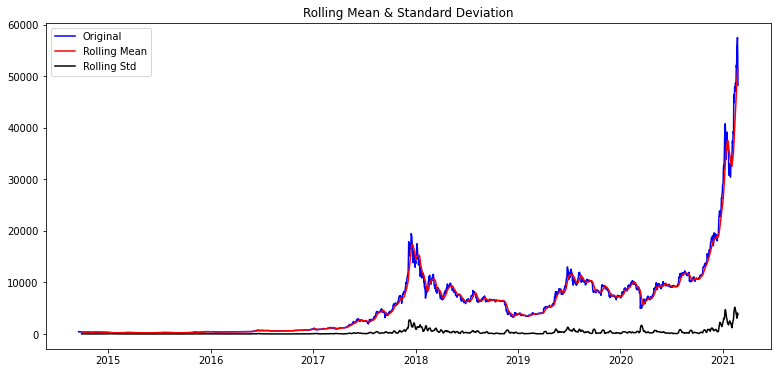

Results of Dickey-Fuller Test:
Test Statistic                    4.502029
p-value                           1.000000
#Lags Used                       27.000000
Number of Observations Used    2324.000000
Critical Value (1%)              -3.433167
Critical Value (5%)              -2.862784
Critical Value (10%)             -2.567432
dtype: float64


TypeError: ignored

In [ ]:
# 기본데이터 활용
# 정성적 그래프 분석
plot_rolling_statistics(ts, window=12) #시계열 단위는 12개월 

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

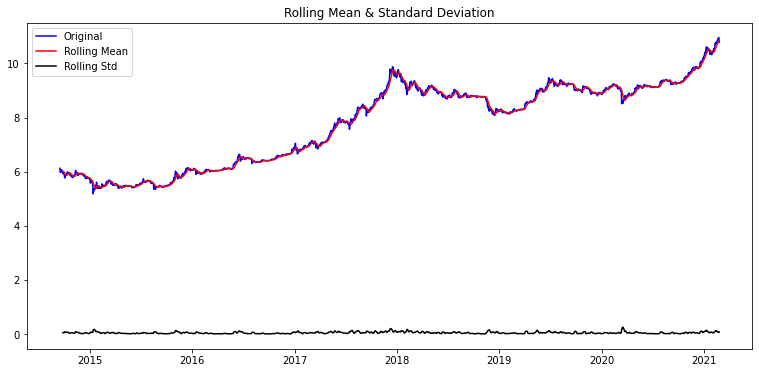

Results of Dickey-Fuller Test:
Test Statistic                    0.269732
p-value                           0.975912
#Lags Used                       10.000000
Number of Observations Used    2341.000000
Critical Value (1%)              -3.433146
Critical Value (5%)              -2.862775
Critical Value (10%)             -2.567428
dtype: float64


TypeError: ignored

In [ ]:
#로그변환 데이터활용
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

- 로그 변환을 통해 p-value가 1에서 0.97로 감소하였다.
- p-value 가 0.97 이므로 유의수준인 0.05보다 크다
- 따라서 귀무가설인 '비트코인의 시계열 데이터는 안정적이지 않다'는 기각 할 수 없다

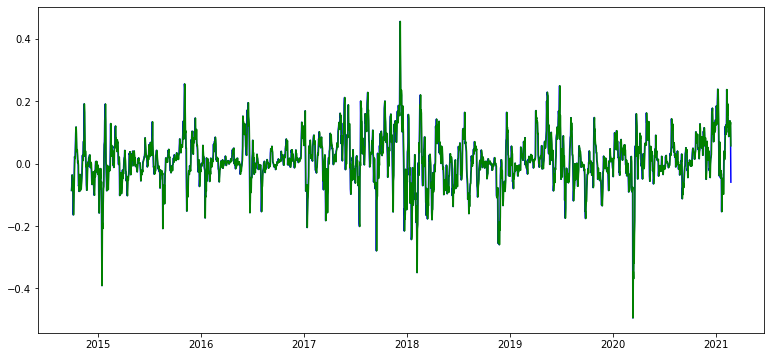

In [ ]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

#### 모델 설정
- ARIMA =  AR(Autoregressive) + I(Integrated) + MA(Moving Average)
- 자기회귀(AR Autoregressive)는 추세와 계절성을 제거한 잔차에 해당하는 부분을 모델링한다
- 이는 과거의 값이 일정한 균형 수준을 유지할 것이라고 예측하는 관점에 해당한다  

- MA(이동평균, Moving Average)는 추세에 해당하는 부분을 모델링 한다
- 모델의 예측보다 관측값이 더 높았을 경우, 다음 예측시에 예측치를 올려잡는 역할을 한다
- 최근 과거데이터의 증가와 감소 패턴이 지속될 것이라고 예측하는 관점에 해당한다

- I (차분누적, Integration)은 시계열 데이터에서 계절성에 해당하는 부분을 모델링 한다
- 위 3가지 모델을 모두 고려하여 적용하는 모델이 ARIMA모델이다


#### ARIMA 모델 사용시 적용할 모수 
- 자기회귀 모형(AR)의 시차를 의미하는 p
- 차분(diffdrence) 횟수를 의미하는 d
- 이동평균 모형(MA)의 시차를 의미하는 q
- 라고 할때

- p + q < 2
- p * q = 0
- 과 같은 값을 적용하는데
- 이는 자기회귀 모형의 시차나 이동평균 모형의 시차 중 하나의 값이 0이라는 설정이다.


#### ARIMA 모델 사용시 적용할 모수 구하기
- ARIMA의 적절한 모수 p,d,q를 선택하기 위한 방법 정론이 없다
- 모수 p,d,q는 
- ACF(Autocorrelation Function)
- PACF(Partial Autocorrelation Function)을 통해 결정할 수 있는데
- AutoCorrelation은 자기상관계수와 같은 것입니다.

- ACF 는 시차(lag)에 따른 관측치들 사이의 관련성을 측정하는 함수이다
- PACF 는 다른 관측치의 영향력을 배제하고 두 시차의 관측치 간 관련성을 측정하는 함수이다
- 즉,
- ACF를 통해 MA(이동평균) 모델의 시차 q를 결정하고
- PACF를 통해 AR(자기회귀) 모델의 시차 p를 결정한다

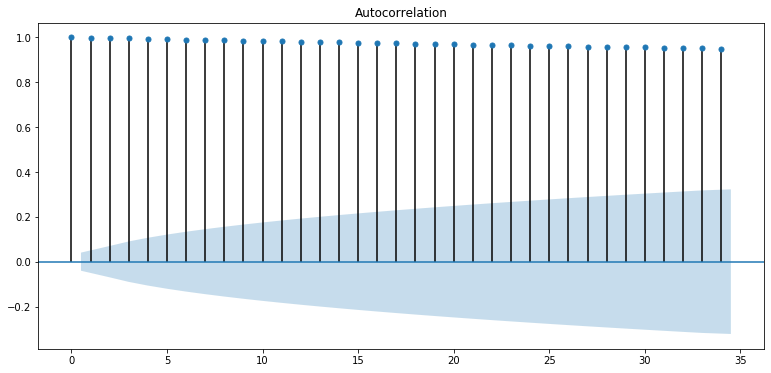

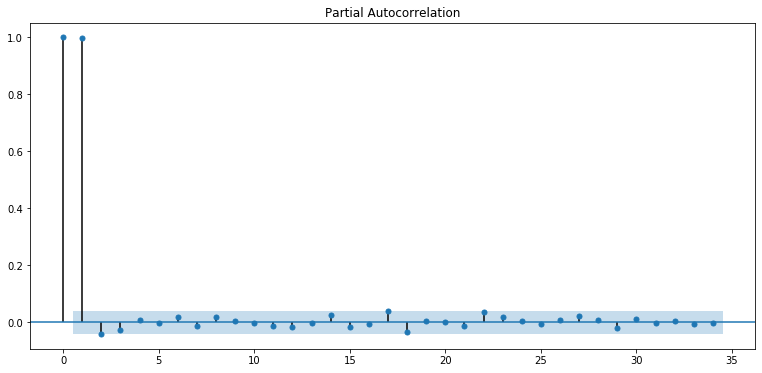

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

- ACF는 유의미한 변화량을 보이지 않으므로 , 이동편균의 시차인 q에 대해서 고려할필요가 없어 보인다. 따라서 이동평균의 시차 q=0 으로 설정하도록 한다
- PCFA 시각화를 보면 P 가 2 이상인 구간에는 PCFA가 거의 0에 가까우므로 p=1 이상적이라고 할 수 있다.


#### 적절한 차분 d 을 찾아서

Results of Dickey-Fuller Test:
Test Statistic                -1.457057e+01
p-value                        4.635789e-27
#Lags Used                     9.000000e+00
Number of Observations Used    2.341000e+03
Critical Value (1%)           -3.433146e+00
Critical Value (5%)           -2.862775e+00
Critical Value (10%)          -2.567428e+00
dtype: float64


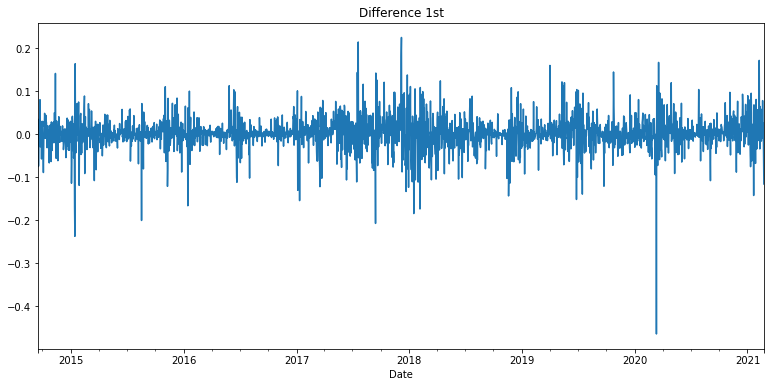

In [ ]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.575306e+01
p-value                        1.216771e-28
#Lags Used                     2.500000e+01
Number of Observations Used    2.324000e+03
Critical Value (1%)           -3.433167e+00
Critical Value (5%)           -2.862784e+00
Critical Value (10%)          -2.567432e+00
dtype: float64


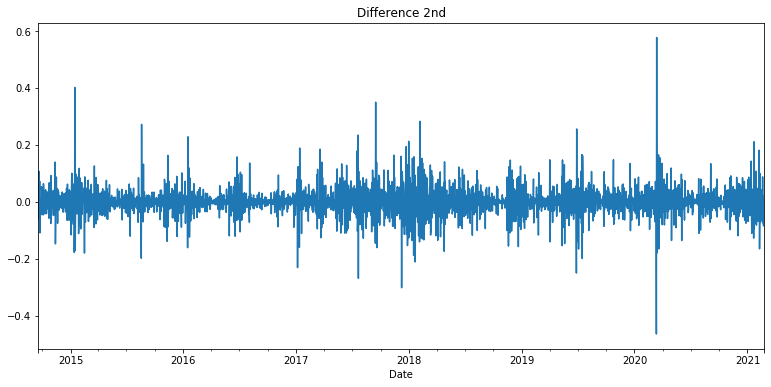

In [ ]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

Results of Dickey-Fuller Test:
Test Statistic                -1.575306e+01
p-value                        1.216771e-28
#Lags Used                     2.500000e+01
Number of Observations Used    2.324000e+03
Critical Value (1%)           -3.433167e+00
Critical Value (5%)           -2.862784e+00
Critical Value (10%)          -2.567432e+00
dtype: float64


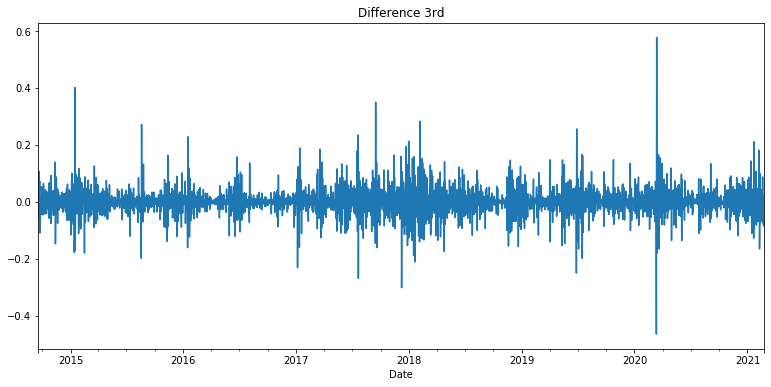

In [ ]:
# 3차 차분 구하기
diff_3 = diff_1.diff(periods=1).iloc[1:]
diff_3.plot(title='Difference 3rd')

augmented_dickey_fuller_test(diff_3)

- 2차시 차분과 3차시 차분에서 유의미한 데이터 안정화가 이루어지지 않았으므로
- 차분 d는 1 혹은 2로 설정하여 모델을 학습하기로 한다

### 학습, 테스트 데이터셋 생성

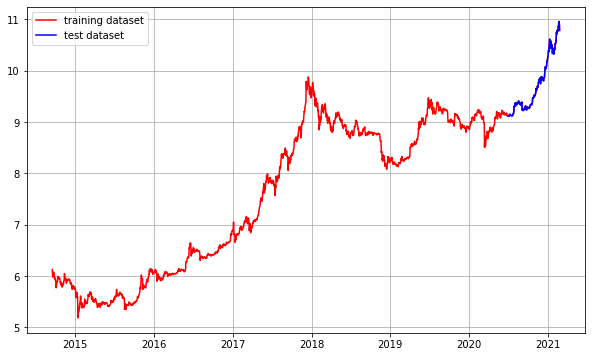

In [ ]:
#학습데이터와 훈련데이터 분리
#분리 비율은 9:1로 설정 하였다
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend();

In [ ]:
#학습데이터와 훈련데이터 분리
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2014-09-17    6.125414
2014-09-18    6.050771
Name: Close, dtype: float64
(2116,)
(236,)


### 적정 ARIMA 모수를 적용한 모델 구축

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0)) #p,d,q -> p = 1 , d = 1 , q = 0
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2115
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3828.357
Method:                       css-mle   S.D. of innovations              0.040
Date:                Thu, 25 Feb 2021   AIC                          -7650.714
Time:                        15:45:03   BIC                          -7633.743
Sample:                    09-18-2014   HQIC                         -7644.500
                         - 07-02-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0014      0.001      1.672      0.094      -0.000       0.003
ar.L1.D.Close    -0.0169      0.022     -0.778      0.436      -0.060       0.026
                                    Root

/home/aiffel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/aiffel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


### ARIMA 모델 훈련과 테스트

In [ ]:
fitted_m.plot_predict();

NameError: ignored

- 클래스 forecast의 객체는 예측 기법, 사용한 데이터, 얻은 점 예측치, 예측구간, 잔차(residual)와 적합값(fitted value)에 관한 정보를 담고 있습니다. 
- autoplot(), summary(), print()를 포함하는 이러한 객체로 작업할 수 있도록 디자인한 몇 가지 함수가 있습니다.

- 다음은 forecast 객체를 출력으로 내는 모든 함수 목록입니다.

- meanf()
- naive(), snaive()
- rwf()
- croston()
- stlf()
- ses()
- holt(), hw()
- splinef()
- thetaf()
- forecast()
  - forecast() 함수는 다양한 종류의 입력값으로 동작합니다. 일반적으로 시계열이나 시계열 모델을 주 입력값으로 받고, 적절한 예측치를 냅니다.  


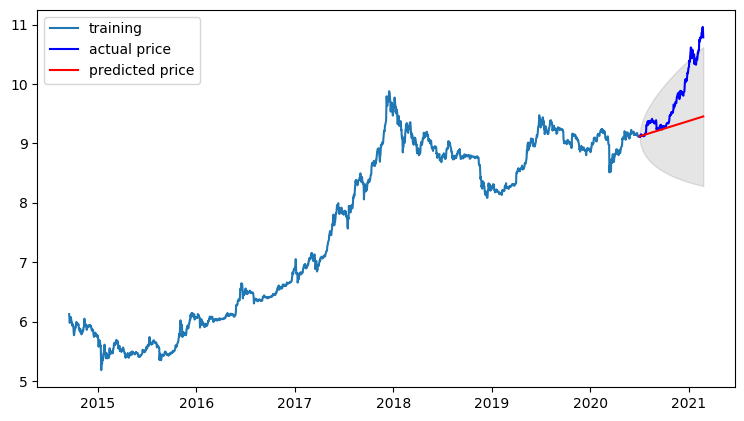

In [ ]:
# Forecast : 결과가 fc에 담김.
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [ ]:
#로그 변환되었던 시계열을 다시 지수 변환하여 원본의 스케일로 평가지표를 계산하기
#np.exp() 함수를 이용하여 원본 스케일로 변환 하였다

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('평균제곱오차 MSE: ', mse) 

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('평균절대 오차 MAE: ', mae) 

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('평균제곱근오차 RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('평균절대비오차 MAPE: {:.2f}%'.format(mape*100))

평균제곱오차 MSE:  203780588.09252962
평균절대 오차 MAE:  8857.071259397107
평균제곱근오차 RMSE:  14275.173837559023
평균절대비오차 MAPE: 30.36%


#### 평가지표 MAPE
- 평균 절대 백분율 오차 ( MAPE )는 예측 방법의 예측 정확도 측정 값으로 , 기계의 회귀 문제에 대한 손실 함수 로도 사용됩니다. 학습 . 일반적으로 다음 공식으로 정의 된 비율로 정확도를 표현한다.(위키피디아)
#### 결론
- MAPE 값 기준으로 구현한 모델의 예측 정확도는 30% 오차율을 보인다.
- 시계열 데이터를 다루는 통계모델을 구축하였지만, 시간관계상 다른 모델을 생성하고 예측값을 병합하여 예측 정확도를 높여보는 과정은 수행하지 못하였다.
- 오늘날 시시각각 쏟아지는 관련 기사에 주식시장 및 가상화폐 시장이 급등락을 하고 있다
- 때론 누군가의 말한마디, 정부정책의 발표, 개인투자자의 단합에 영향을 받는 시장의 모습을 보면,그 불완전성은 더욱 커질것이라고 생각한다.
- 앞으로 시장경제를 예측하기 위한 지표로 전통적인 경제 지표 뿐 아니라, 그동안 경제 지표에 반영되지 않았던 인터넷 커뮤니티의 키워드들을 숫자화 하여 이를 특성feature으로 반영한 모델들이 고려되어져야 할 것 같다.
- 또한 탈중앙화 경제,프로토콜 경제가 제도권에 안착하기 위해서는 실제 콘텐츠와의 연계로 해당 가상자산의 가치를 인정받고, 이와 더불어 투자자에 대한 보호정책, 국가디지털 통화와의 연계등을 더욱 고려해 보아야 할 것이다.

### 에필로그 
- 본인이 실제로 예측해보고 싶었던 부분은 코로나 백신접종과 의료붕괴 예측모델이었다.
- 해당 문제를 다루기에는 굉장히 복잡하게 얽혀있는 의료산업에 대한 배경지식이 필요하다고 판단하여 중도 포기하였지만,
- 앞단의 문제 정의와 다루고자 하는 이유 그리고 필요하다고 생각했던 데이터와 특성들을 기록 해 보았다.



####  코로나 현황 과 코로나 백신 접종 

- 미국의 경우 코로나로 인한 누적 사망자가 50만명이 넘었고, 이는 1,2차 세계대전 당시 사망한 미군의 숫자 합계와 비슷하다.

-한국의 경우 2월 기준으로 누적환자는 88,120명 으로
  - 격리해제된 환자수는 79,050 명
  - 치료중(격리중) 환자수는 7,494 명
  - 사망 환자수는 1,576 명 

-검사 완료 소계는 6,436,000 중
  - 양성은 88,120명
  - 음성은 6,347,880명
  - 검사 중은 74,988명

-환진환자 지역별 비율은
  - 서울 31%
  - 경기 26%
  - 대구 10%
  - 인천 5%
  - 기타 28%

- 3월-4월 4차 코로나 대 유행이 예상되는 중대한 고비를 앞두고, 1차 코로나 백신 접종일정과 대상자가 공표되었다.

- 1분기 접종은 2월 26일 코로나 백신 접종 시작되고 1차,2차에 나누어 백신접종이 이루어져야 항체가 형성된다고 한다.
- 65세 미만 대상은 아스트라제네카 백신으로 , 65세 이상은 화이자 백신으로 접종한다.
- 1분기(1-3월) 입고 수량은 아스트라제네카 백신으로 수량은 75만명 분이며 1차 접종 대상(3월까지)은 전 국민의 1.5% 수준이다. (집단면역을 형성하기 위해서는 전 국민의 60% 가 면역력을 보유해야 함)

- 보건당국은 11월을 기점으로 집단면역(전체 인구의 60% 면역형성)을 목표로 하며
- 접종 계획은 아래와 같다
    - 1분기(1-3월) 접종 대상은 1순위 그룹 및 2 순위 그룹이다
    - 2분기(4-6월) 접종 대상은 2순위 그룹 중 미접종자와 3순위 그룹이다
    - 3분기(7-9월) 접종 대상은 만성질환자 및 일반 성인등을 대상
    - 4분기(10-12월) 미접종자 
    
- 접중 대상은 우선순위에 따라 선별된다.(추후 변동 가능)
    - 1순위
      - 코로나19 환자를 치료하는 의료진 (약 50,000명) 
      - 요양병원 및 시설 (약 272,000명)*65세 이상은 1분기 접종대상에서 제외  
        (아스트라제네카 65세 이상 접종 미승인으로 화이자 접종 대상자)
    - 2순위
      - 의료기관 종사자 (약 354,000명)
    - 3순위
      - 역학 및 요원 (약 78,000명)
    - 4순위
      - 치료병원 종사자(약 55,000명)
      - 1회 접종시 80% , 2회 접종시 95%의 면역효과를 보임
      - 접종 간격은 1회 접종후 21일 -  28일의 간격을 두고 총 2번 접종을 받아야 한다.
        - 이는 백신공급일정과 백신접종현황에 따라 더 지연될 가능성이 크다.
        - 최대 42일까지 간격을 두고, 1차 접종 백신과 다른 종류의 백신을 혼용하여 접종할 수 있다.(미국 CDC)

- 1차 접종 후 아래와 같은 그룹으로 분류할 수 있을 것이다.
    - 1차 접종 후 면역이 형성된 사람
      - 80 % 면역력 형성 
    - 1차 접종 후 면역이 형성되지 않은 사람
      - 1차 접종 후 42일 내 2차 접종을 한 사람
        - 1차 접종과 동일한 백신을 접종 한 사람
          - 95 % 면역력 형성
        - 1차 접종과 동일하지 않은 백신을 접종 한 사람
          - 동일한 백신을 접종한 사람과 동일한 면역력이 형성된다는 근거가 없다.
      - 1차 접종 후 42일 내 2차 접종을 하지 않은 사람
        - 다시 1차 접종을 해야한다

#### 코로나 접종을 앞두고

- 지난 19일 
  - 의사가 강력범죄를 저질러 금고 이상의 형을 받으면 면허를 취소하는 내용의 의료법 개정안이 국회 보건복지위원회를 통과하여, 법제사법위원회의 심사를 앞두고 있다
  - 이에 따라 대한의사협회는 참을 수 없는 분노를 표명하며 총 파업을 예고했다.
  - 이에 정부는 다른 전문직종도 금고 이상의 형을 받으면 자격을 박탈하거나 정지하는데, 아직까지 의사는 그 직업의 특수성 때문에 의료인의 범죄 처벌이 상대적으로 느슨했던것이 사실이다. 이에 따라 다른 직종과의 형평성과 공정성 그리고 의료의 특수성을 감안하고 숙고하여 결정된 법안이라는 입장이다.

- 다른 관점에서 바라보기
  - 의사협회는 독립적 면허 관리를 위한 '대한의사면허관리원'설립을 지난 1월 추진했다.
    - 현재까지 의사면허는 정부에서 발급하고, 유지.관리는 각 단계별로 공공과 민간에서 분리 운영하고 있으며, 의사협회 내부에서도 '중앙윤리위원회'를 구성하여 의사 면허를 관리 하고 있다.
      - 중윤위에서 보건복지부 장관에게 면허정지를 요구할 수 있는 경우는 '의료인의 품위를 심각하게 손상시키는 행위를 한 때'로 한정하고 있어, 환자 성폭행 및 살인 과 같은 사회적 공분을 일으킨 비도덕적 행위에 대한 자체적인 규제 방법이 없는것 또한 현실이다.

- 의사는 공공재 인가 ?
  - 국가적 재난 상황에서 전공의가 타 의료기관에서 근무할 수 있는 개정안이 23일 국무회의를 통과하였다. 
  - 이는 수련과정에서 전문지식을 쌓아야 할 시기에 겸직형태가 장기화 될 수 있다는 우려를 낳고 있다
  - 복지부 측은 '전공의 파견은 해당 전공의가 동의해야 가능한 것으로 강제동원은 없을 것'이라고 한다.
    - 이를 두고 의료계는 정부가 의료체계를 지휘할 법적 근거를 마련했다고 보고, 복지부는 참여의 길을 마련했다고 본다.
  - 이 외에도 수많은 논쟁과 갈등은 1964년 처음도입된 건강보험제도에서 부터 시작된것이 아닐까 생각한다.

- 왜 이 문제를 중요하다고 생각하는가 ?
  - 각각의 입장을 차치하고라도 대규모 의료진 파업에 따른 의료공백이 발생한다면 의료붕괴가 발생할 수 있을것이다.
  - 더불어 공공병원 간호사 및 긴급돌봄 노동자들이 메뉴얼 수립과 인력확충을 촉구하는 목소리도 있다. 코로나 확진자 70%가 수도권에 집중된 상황임에도 서울시에는 1년 넘게 확립된 메뉴얼이 없다는것을 지적하였다.
  - 현행법상 의료인이 아니면 누구든지 의료행위를 할 수 없고, 의료인도 면허된 것 이외의 의료행위를 할 수 없다.
  - 즉, 처방을 내릴 의사가 없다면, 간호사를 포함한 의료노동자가 임의로 백신접종을 수행 할 법적 근거가 없다.
  - 이처럼 다양한 요인으로 코로나접종 계획에 차질이 생길 수 있다고 판단하였고,이를 과거 보건데이터와 코로나 확진환자 추이를 바탕으로 의료공백발생 가능성과 의료붕괴 가능성을 살펴보고자 한다. 




#### COVID19로 불거진 의료산업계의 문제를 알아보고, 의료 붕괴 예측모델을 만들기
  - 의료 붕괴의 기준 설정해보고,  
  - 서울 공공데이터를 바탕으로 서울 내 구별 의료시설 및 의료인 현황리포트를 바탕으로 하였다.
  - 코호트 격리와 같은 코로나환자발생으로 인한 병동폐쇄된곳이 있다면 그것을  어떻게 정량화 할 것인가
  - 요양원의 경우 집단발병으로 인해 요양시설 전체가 격리되는(코호트 격리)로 감연된 의료진이 감염환자를 돌보는 상황도 발생하였다.
  - 총 파업시 발생할 의료공백은 어떻게 정량화 하고 이를 예측모델에 반영할 것 인가

- 문제 유형 정의
  - 1)코로나 확진 환자 추이에 따른 수도권 의료붕괴 가능성 예측하는 회귀모델
  - 2)의료공백(인력,시설)에 따른 수도권 의료붕괴 가능성 예측하는 회귀모델
    - 의료붕괴란 무엇이며, 그 기준은 무엇일까?
      - 환자수보다 병상수가 부족할 때
      - 환자수보다 의료인수가 부족할 때
      - 환자수보다 치료제가 부족할 때
      - 치료환자수보다 신규환자수가 많아질 때
        - 경증환자수보다 중등도 이상 환자수가 많아질 때
      
    - 필요한 데이터는 무엇이 있을까?
      - 총 의료병상 수
      - 기존 입원 및 신규 입원 환자 수 
      - 잔여 병상수 (이때 코로나 전용 음압 병동은 제외한다)
      - 의료행위자 수
    

- 시도별로 구성된 환자관리반 의료진이 확진자를 경증·중등도·중증·최중증 등 중증도를 4가지로 분류함
  - 경증은 바이러스 폐렴 또는 저산소증 없는 코로나19 임상증상을 보이는 확진환자
    - 발열, 식욕부진, 근육통, 인후통, 코막힘, 두통 등의 증상이 있으며 드물게 설사, 오심, 구토  
  - 생활치료센터는 입원 환자 중 임상증상이 호전돼 퇴원 후 시설 입소가 가능할 것으로 의사가 판단한 경우 또는 확진환자중 중증도 분류에 따라 병원 치료가 필요하지 않다고 분류된 경증의 경우 입소하는 시설

- 중등도·중증·최중증 환자 등은 환자 상태에 따라 감염병전담병원, 국가지정 입원 치료기관 등 치료 병상에서 입원해 치료를 받는다. 
  - 이들은 폐렴, 중증폐렴, 급성호흡곤란증후군, 패혈증, 패혈증쇼크 등이 동반되는 경우다.


- 코로나 확진 환자의 중증도에 따른 분류 현황
(평균 국가별 환직환자의 81%는 경증 , 14%는 중증, 5%는 위중 환자로 집계됨)
  - 경증 환자 ( 입원치료 후 시설입소 대상자) 
    - 경증 환자 수 
      - 경증 환자 중 퇴원한 환자 수
      - 경증 환자 중 퇴원했다가 다시 입원한 환자 수
    - 생활치료센터 (국가운영시설 및 숙박시설) 수
    - 생활치료센터 수용가능 환자수 - 현재 입원중인 경증 환자 수 = 생활치료센터 잔여 병상 수
  - 중등도, 중증 , 최중증 환자별 입원 치료 기관의 분류 정보
    - 중등도 환자수 
      - 중등도 환자 중 경증으로 호전된 환자 수
      - 중등도 환자 중 중증으로 악화된 환자 수
    - 중증 환자수
      - 중증 환자 중 중등도로 호전된 환자 수
      - 중증 환자 중 최중증으로 악화된 환자 수
    - 최중증 환자수
      - 최중증 환자 중 중증으로 호전된 환자 수
      - 최중증 환자 중 사망한 환자 수 
  - 이에 따른 가용 병상수 와 활성 의료인의 수  


- 인구 10만명당 음압 격리병상수는 전국 평균 2.2병상으로 서울은 4.2병상으로 다른 지역에 비해 인구수 대비 공급량이 많은 편이다.


#### 그 밖의 문제들
  - 코로나 백신 접종 이후
  - 항체가 생겨도 언제까지 유지되는지 알 수 없다
  - 백신 접종시 사람마다 이상반응이 다르다
  - 백신 접종에 따른 피해 및 부작용에 대해서는 기존 예방접종 피해 보상 제도를 바탕으로 국가에서 보상한다.
    - 지난 5년간 부작용으로 신고한 3,804건 중 실제 보상을 받은 피해자는 약 6%인 230건으로 집계된다.
    - 이러한 배경에는 감영병의 예방및 관리에 관한 법률에 따르면 본인 부담금 진료비가 "30만원 미만"일 경우 피해보상 신청이 불가능하다는 조항이 있기 때문으로 보여진다
    - 추가로 피해보상절차의 복잡성도 피해자들이 보상신청을 포기하는 사례도 많을것으로 보여진다.



#### 결론
- 코로나로 인한 경제적 피해 보상 뿐만 아니라, 접종에 대한 국민 불안감 완화가 필요
- 이를 위한 투명한 정보 공개와 접종후 모니터링에 국민과 의료진의 적극적 참여 필요
- 보다 근복적인 의료체계(의료수가,건강보험 등)의 개선과 보상이 필요